## Мировые линии центров зарядов:

$$
x_1(t) = \frac{1}{2} a_1 t^2, \quad x_2(t) = d + \frac{1}{2} a_2 t^2
$$

Мировые трубки — это области вокруг этих линий, с фиксированной шириной (в сопутствующей системе).


In [247]:
var("t1_0, t2_0, a_1, a_2, d, l")

t1   = sqrt(2*x/a_1)
t1_l = sqrt(2*(x+l)/a_1)
t1_r = sqrt(2*(x-l)/a_1)

t2   = sqrt(2*(x-d)/a_2)
t2_l = sqrt(2*(x+l-d)/a_2)
t2_r = sqrt(2*(x-l-d)/a_2)

Как найти уравнение перпендикуляра

Найдите угловой коэффициент (наклон) мировой линии. Если угловой коэффициент мировой линии равен $k= (dt/dx) = \frac{1}{\left(a_1 \cdot t_1\right)}$,

In [248]:
show(t1.diff(x).expand())

1/2*sqrt(2)/(a_1*sqrt(x/a_1))

 то угловой коэффициент перпендикулярной прямой равен $ m = -1/k = (dt/dx) = -\left(a_1 \cdot t_1\right)$. 
Используйте формулу уравнения прямой вида $t_1 = -\left(a_1 \cdot t_1\right) x + b$, подставив точку проведения перпендикуляра отрезка и новый угловой коэффициент, чтобы найти b. 

 $t_1 = -\left(a_1 \cdot t_1\right) \frac{1}{2} a_1 t_1^2 + b$
 
 $b = t_1  + \frac{a_1^2}{2}  t_1^3$

In [265]:
def tubes_plot(A1, A2, L, D, T1, T2):

    # displacement of charge 1 center
    # перемещение центра каждого из зарядов исходя из ускорения и времени
    S1 = A1*T1^2/2
    S2 = A2*T2^2/2

    values = [a_1 == A1, a_2 == A2, d == D, l == L, t1_0 == -0.0, t2_0 == 0.0]
    
    # угловой коэффициент прямой перпендикулярной центральной мировой линии 
    # в точке, соответствующей вычисленной выше перемещению равен
    # $ m = -1/k = (dt/dx) = -\left(a_1 \cdot t_1\right)$.
    m1 = -A1*T1
    m2 = -A2*T2
    
    # Используйте формулу уравнения прямой вида
    # $t_1 = -\left(a_1 \cdot t_1\right) x + b$,
    # подставив точку проведения перпендикуляра отрезка
    # и новый угловой коэффициент, чтобы найти b.
    b1 = T1 - m1 * S1
    b2 = T2 - m2 * (D + S2)
    
    # уравнения прямой перпендикулярной центральной мировой линии каждого из зарядов
    perp_1 = m1*x + b1
    perp_2 = m2*x + b2
    
    # x координата точки пересечения перпендикуляра к центральной мировой линии
    # с левой и правой границей мировой трубки
    # для каждого из зарядов
    
    x_1_l = solve ((t1_l^2 == perp_1^2).subs(values), [x])[0].rhs()
    x_1_r = solve ((t1_r^2 == perp_1^2).subs(values), [x])[0].rhs()
    
    x_2_l = solve ((t2_l^2 == perp_2^2).subs(values), [x])[0].rhs()
    x_2_r = solve ((t2_r^2 == perp_2^2).subs(values), [x])[0].rhs()
    
    # t координата точки пересечения перпендикуляра к центральной мировой линии
    # с левой и правой границей мировой трубки
    # для каждого из зарядов

    t_1_l = t1_l.subs(x == x_1_l).subs(values)
    t_1_r = t1_r.subs(x == x_1_r).subs(values)

    t_2_l = t2_l.subs(x == x_2_l).subs(values)
    t_2_r = t2_r.subs(x == x_2_r).subs(values)
    
    # угловой коэффициент прямой перпендикулярной левой и правой границе мировой трубки
    # $ m = -1/k = (dt/dx) = -\left(a_1 \cdot t_1\right)$.
    m1_l = -A1*t_1_l
    m1_r = -A1*t_1_r
    m2_l = -A2*t_2_l
    m2_r = -A2*t_2_r

    # Используйте формулу уравнения прямой вида
    # $t_1 = -\left(a_1 \cdot t_1\right) x + b$,
    # подставив точку проведения перпендикуляра отрезка
    # и новый угловой коэффициент, чтобы найти b.
    b1_l = t_1_l - m1_l * x_1_l
    b1_r = t_1_r - m1_r * x_1_r

    b2_l = t_2_l - m2_l * x_2_l
    b2_r = t_2_r - m2_r * x_2_r
    
    # уравнения прямой перпендикулярной левой и правой границе мировой трубки каждого из зарядов
    perp_1_l = m1_l*x + b1_l
    perp_1_r = m1_r*x + b1_r
    perp_2_l = m2_l*x + b2_l
    perp_2_r = m2_r*x + b2_r
    
    # x координата точки пересечения перпендикуляра к левой и правой границе мировой трубки
    # с противоположной границей мировой трубки
    # для каждого из зарядов
    
    x_1_lr = solve ((t1_l^2 == perp_1_r^2).subs(values), [x])[1].rhs()
    x_1_rl = solve ((t1_r^2 == perp_1_l^2).subs(values), [x])[1].rhs()
    
    x_2_lr = solve ((t2_l^2 == perp_2_r^2).subs(values), [x])[1].rhs()
    x_2_rl = solve ((t2_r^2 == perp_2_l^2).subs(values), [x])[1].rhs()


    plt = Graphics()

    plt_tube_1 = (
        plot(((t1_0 + t1).subs(values),    (t1_0 -t1).subs(values)),   x, 0,   S1, color="red") +
        plot(((t1_0 + t1_l).subs(values),  (t1_0 -t1_l).subs(values)), x, 0-L, x_1_l, color="green") +
        plot(((t1_0 + t1_r).subs(values),  (t1_0 -t1_r).subs(values)), x, 0+L, x_1_r, color="blue")
    )

    plt_tube_2 = (
        plot(((t2_0 + t2).subs(values),    (t2_0 -t2).subs(values)),   x, D,   D + S2, color="red") +
        plot(((t2_0 + t2_l).subs(values),  (t2_0 -t2_l).subs(values)), x, D-L, x_2_l, color="green") +
        plot(((t2_0 + t2_r).subs(values),  (t2_0 -t2_r).subs(values)), x, D+L, x_2_r, color="blue")
    )

    plt += plt_tube_1
    plt += plt_tube_2

    plt_perp_1   = plot((perp_1, -perp_1),   x, x_1_l, x_1_r, color="red")
    plt_perp_2   = plot((perp_2, -perp_2),   x, x_2_l, x_2_r, color="red")

    plt += plt_perp_1
    plt += plt_perp_2
    
    plt_perp_1_l   = plot((perp_1_l, -perp_1_l),   x, x_1_l, x_1_rl, color="green")
    plt_perp_1_r   = plot((perp_1_r, -perp_1_r),   x, x_1_lr, x_1_r, color="blue")
    plt_perp_2_l   = plot((perp_2_l, -perp_2_l),   x, x_2_l, x_2_rl, color="green")
    plt_perp_2_r   = plot((perp_2_r, -perp_2_r),   x, x_2_lr, x_2_r, color="blue")
    plt += plt_perp_1_l
    plt += plt_perp_1_r
    plt += plt_perp_2_l
    plt += plt_perp_2_r

    plt.show(aspect_ratio=1, axes=False)

In [275]:
# accelerations
A1 = 2
A2 = 2

#half-length of the charges
L = 0.2

# distance between centers of the charges
D = 2*L + 0.001

# time duration of the tube
T1 = 0.25
T2 = 0.12

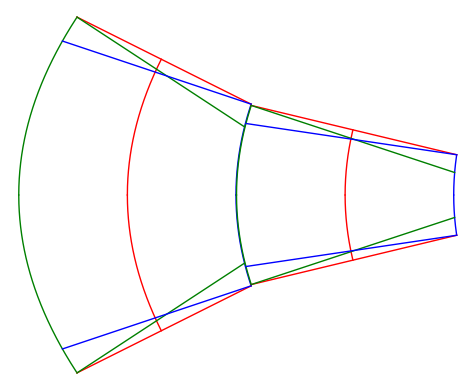

In [276]:
tubes_plot(A1, A2, L, D, T1, T2)

In [270]:
@interact
def _(A1=slider(srange(0,10,.1),default = 2),
      A2=slider(srange(0,10,.1),default = 2),
      T1=slider(srange(.01,1,.01),default = 0.25),
      T2=slider(srange(.01,1,.01),default = 0.16),
      D=slider(srange(.01,10,.01),default = 2*L + 0.02)):
    tubes_plot(A1, A2, L, D=D, T1=T1, T2=T2)

Interactive function <function _ at 0x7efeb86e00d0> with 5 widgets
  A1: SelectionSlider(description='A1', ind…


## 🔷 Шаг 1: Модель и обозначения

Рассмотрим **двумерное сечение** пространства-времени: оси $(t, x)$.  
Два заряда движутся вдоль оси $x$, с ускорениями $a_1$, $a_2$, начальные координаты:  
- Заряд 1: $x = 0$,
- Заряд 2: $x = d$.

Их мировые линии (в нерелятивистском приближении, $v \ll c$):

$$
t_1(\tau) = \tau, \quad x_1(\tau) = \frac{1}{2} a_1 \tau^2
$$
$$
t_2(\tau) = \tau, \quad x_2(\tau) = d + \frac{1}{2} a_2 \tau^2
$$

Мировые трубки — узкие полосы вокруг этих линий.

---

## 🔷 Шаг 2: Нормальные сечения

В каждый момент $\tau$, **нормальное сечение** — это прямая, **ортогональная 4-скорости**.

При $v \ll c$, 4-скорость: $u^\mu \approx (c, v)$,  
ортогональный вектор: $(v, c)$,  
в $(t,x)$-сечении: наклон $\frac{dt}{dx} = \frac{v}{c^2}$.

Но при $v \ll c$, можно считать, что **нормальное сечение почти горизонтально**, и его уравнение:

$$
t = \tau + \frac{1}{2c^2} a_i (x - x_i(\tau)) \quad \text{(с точностью до } 1/c^2\text{)}
$$

👉 Однако, для простоты, в **нулевом приближении** (малые скорости, малые ускорения) будем считать, что **нормальные сечения горизонтальны**:  
- В трубке 1: $t = t_1$,
- В трубке 2: $t = t_2$.

---

## 🔷 Шаг 3: Построение гладкой границы $t = t(x)$

Пусть область интегрирования ограничена:
- Снизу: кривая $t = t_{\text{нижн}}(x)$,
- Сверху: кривая $t = t_{\text{верх}}(x)$.

Рассмотрим **верхнюю границу** — она соединяет два нормальных сечения.

Пусть:
- В области заряда 1 ($x \in [0 - \ell, 0 + \ell]$): $t = t_0$,
- В области заряда 2 ($x \in [d - \ell, d + \ell]$): $t = t_0 + \delta t$,
- В промежутке $x \in [\ell, d - \ell]$: плавный переход.

Но! Чтобы минимизировать "длину" границы (аналог $\int \sqrt{1 + (dt/dx)^2} dx$), нужно сделать $dt/dx$ как можно меньше.

👉 **Оптимальная кривая** — **гладкая, с нулевыми производными на концах**.

Используем **кубический сплайн**:

$$
t(x) = 
\begin{cases}
t_0 & x \in [0 - \ell, \ell] \\
t_0 + A(x - \ell)^3 + B(x - \ell)^2 + C(x - \ell) & x \in [\ell, d - \ell] \\
t_0 + \Delta t & x \in [d - \ell, d + \ell]
\end{cases}
$$

Где $\Delta t = \frac{1}{2c^2} a_2 d \cdot t_0$ — поправка из-за разного ускорения.

Условия гладкости:
- $t(\ell) = t_0$, $t'( \ell) = 0$,
- $t(d - \ell) = t_0 + \Delta t$, $t'(d - \ell) = 0$.

Решая, получаем:

$$
t(x) = t_0 + \Delta t \cdot \left( \frac{x - \ell}{d - 2\ell} \right)^2 \left( 3 - 2 \frac{x - \ell}{d - 2\ell} \right)
\quad \text{для} \quad x \in [\ell, d - \ell]
$$

✅ Это — **гладкая, $C^1$ кривая**, без изломов, минимальной "кривизны".



## 🔷 Шаг 4: Минимизация кривизны — кубический сплайн

Минимизация $\int (f'')^2 dx$ при заданных $f, f'$ на концах даёт **кубический сплайн**.

Решение:

$$
f(x) = t_0 + \frac{a_1}{c^2} x \left(1 - \frac{x}{d}\right)^2 + \frac{a_2}{c^2} (x - d) \left(\frac{x}{d}\right)^2
$$

✅ Проверка:
- $f(0) = t_0$, $f'(0) = \frac{a_1}{c^2}$,
- $f(d) = t_0$, $f'(d) = \frac{a_2}{c^2}$,
- Гладкая, без изломов.
